In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 'normal' if x=='normal' else 'attack')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [4]:
scan = set(['ipsweep', 'portsweep', 'nmap', 'satan'])
dos = set(['neptune', 'smurf', 'pod', 'teardrop', 'land'])
access = set(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezclient', 'warezmaster'])
exploit = set(['buffer_overflow', 'loadmodule', 'rootkit', 'perl'])
backdoor = set(['back','spy'])

df['attack_category'] = None

for i in range(len(df)):
  attk = df.loc[i,'attack']
  if attk in scan:
    df.loc[i,'attack_category'] = 'scan'
  elif attk in dos:
    df.loc[i,'attack_category'] = 'dos'
  elif attk in access:
    df.loc[i,'attack_category'] = 'access'
  elif attk in exploit:
    df.loc[i,'attack_category'] = 'exploit'
  elif attk in backdoor:
    df.loc[i,'attack_category'] = 'backdoor'
  else:
    df.loc[i,'attack_category'] = 'normal'

In [5]:
df['cbin'] = None
df['sbin'] = None

for i in range(len(df)):
    counts = df.loc[i,'count']
    if counts < 100:
        df.loc[i,'cbin'] = 1
    elif counts >= 100 and counts < 200:
        df.loc[i,'cbin'] = 2
    elif counts >= 200 and counts < 300:
        df.loc[i,'cbin'] = 3
    elif counts >= 300 and counts < 400:
        df.loc[i,'cbin'] = 4
    elif counts >= 400 and counts < 500:
        df.loc[i,'cbin'] = 5
    else:
        df.loc[i,'cbin'] = 6


    scounts = df.loc[i,'srvcount']
    if scounts < 100:
        df.loc[i,'sbin'] = 1
    elif scounts >= 100 and scounts < 200:
        df.loc[i,'sbin'] = 2
    elif scounts >= 200 and scounts < 300:
        df.loc[i,'sbin'] = 3
    elif scounts >= 300 and scounts < 400:
        df.loc[i,'sbin'] = 4
    elif scounts >= 400 and scounts < 500:
        df.loc[i,'sbin'] = 5
    else:
        df.loc[i,'sbin'] = 6

In [6]:
service_count = pd.pivot_table(data=df,index='service',columns='sbin',values='duration',aggfunc='count',margins=True).sort_values(by='All',ascending=False)

In [7]:
pd.pivot_table(data=df,index='sbin',columns='attack_category',values='duration',aggfunc='count')

attack_category,access,backdoor,dos,exploit,normal,scan
sbin,,,,,,
1,985.0,958.0,42627.0,52.0,60541.0,11550.0
2,8.0,NaN,238.0,NaN,4232.0,106.0
3,NaN,NaN,271.0,NaN,2084.0,NaN
4,NaN,NaN,232.0,NaN,389.0,NaN
5,NaN,NaN,369.0,NaN,90.0,NaN
6,NaN,NaN,1234.0,NaN,7.0,NaN


In [8]:
pd.pivot_table(data=df,index='cbin',columns='attack_category',values='duration',aggfunc='count')

attack_category,access,backdoor,dos,exploit,normal,scan
cbin,,,,,,
1,993.0,958.0,8195.0,51.0,62365.0,9341.0
2,NaN,NaN,15974.0,1.0,2999.0,476.0
3,NaN,NaN,18808.0,NaN,1556.0,303.0
4,NaN,NaN,391.0,NaN,317.0,407.0
5,NaN,NaN,369.0,NaN,90.0,329.0
6,NaN,NaN,1234.0,NaN,16.0,800.0


In [9]:
pd.DataFrame(df['serrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
serrorrate,125973.0,0.284485,0.446456,0.0,0.0,0.0,1.0,1.0


In [10]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['serrorrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.07
80 percentile value is 1.0
90 percentile value is 1.0
100 percentile value is 1.0


In [11]:
df['serror_bin'] = None

for i in range(len(df)):
    serror_rate = df.loc[i,'serrorrate']
    if serror_rate < 0.25:
        df.loc[i,'serror_bin'] = 1
    elif serror_rate >= 0.25 and serror_rate < 0.5:
        df.loc[i,'serror_bin'] = 2
    elif serror_rate >= 0.5 and serror_rate < 0.75:
        df.loc[i,'serror_bin'] = 3
    else:
        df.loc[i,'serror_bin'] = 4

In [12]:
df['serror_bin'].value_counts()

,count
serror_bin,
1,89654
4,35097
3,663
2,559


In [13]:
pd.pivot_table(data=df,index='serror_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
serror_bin,,,,,,,
1,978.0,948.0,10533.0,50.0,65927.0,11218.0,89654
2,NaN,3.0,2.0,NaN,520.0,34.0,559
3,7.0,7.0,99.0,NaN,459.0,91.0,663
4,8.0,NaN,34337.0,2.0,437.0,313.0,35097
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [14]:
pd.DataFrame(df['rerrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
rerrorrate,125973.0,0.119958,0.320436,0.0,0.0,0.0,0.0,1.0


In [15]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['rerrorrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 1.0
100 percentile value is 1.0


In [16]:
df['rerror_bin'] = None

for i in range(len(df)):
    serror_rate = df.loc[i,'rerrorrate']
    if serror_rate < 0.25:
        df.loc[i,'rerror_bin'] = 1
    elif serror_rate >= 0.25 and serror_rate < 0.5:
        df.loc[i,'rerror_bin'] = 2
    elif serror_rate >= 0.5 and serror_rate < 0.75:
        df.loc[i,'rerror_bin'] = 3
    else:
        df.loc[i,'rerror_bin'] = 4

In [17]:
df['rerror_bin'].value_counts()

,count
rerror_bin,
1,110369
4,15067
3,270
2,267


In [18]:
pd.pivot_table(data=df,index='rerror_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
rerror_bin,,,,,,,
1,940.0,803.0,38064.0,51.0,64263.0,6248.0,110369
2,NaN,96.0,12.0,NaN,52.0,107.0,267
3,3.0,45.0,7.0,1.0,146.0,68.0,270
4,50.0,14.0,6888.0,NaN,2882.0,5233.0,15067
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [19]:
df['binary_attack'] = df['attack'].apply(lambda x: 0 if x=='normal' else 1)

In [20]:
pd.pivot_table(data=df,index='rerror_bin',columns='serror_bin',values='binary_attack',aggfunc='sum',margins=True)

serror_bin,1,2,3,4,All
rerror_bin,,,,,
1,11353.0,2.0,103.0,34648.0,46106
2,119.0,2.0,82.0,12.0,215
3,81.0,24.0,19.0,NaN,124
4,12174.0,11.0,NaN,NaN,12185
All,23727.0,39.0,204.0,34660.0,58630


<Axes: xlabel='serrorrate', ylabel='rerrorrate'>

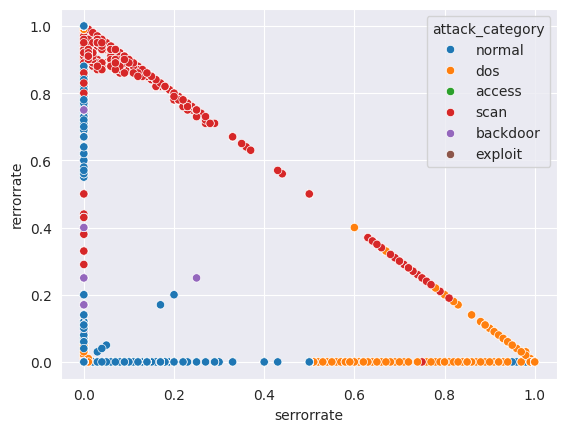

In [21]:
sns.scatterplot(data=df,x='serrorrate',y='rerrorrate',hue='attack_category')

In [22]:
pd.DataFrame(df['srvserrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
srvserrorrate,125973.0,0.282485,0.447022,0.0,0.0,0.0,1.0,1.0


In [23]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['srvserrorrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 1.0
90 percentile value is 1.0
100 percentile value is 1.0


In [24]:
df['srvserrorrate_bin'] = None

for i in range(len(df)):
    rate = df.loc[i,'srvserrorrate']
    if rate < 0.25:
        df.loc[i,'srvserrorrate_bin'] = 1
    elif rate >= 0.25 and rate < 0.5:
        df.loc[i,'srvserrorrate_bin'] = 2
    elif rate >= 0.5 and rate < 0.75:
        df.loc[i,'srvserrorrate_bin'] = 3
    else:
        df.loc[i,'srvserrorrate_bin'] = 4

In [108]:
df['srvserrorrate_bin'].value_counts()

,count
srvserrorrate_bin,
1,89819
4,35046
2,590
3,518


In [25]:
pd.pivot_table(data=df,index='srvserrorrate_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
srvserrorrate_bin,,,,,,,
1,978.0,946.0,10637.0,52.0,66057.0,11149.0,89819
2,NaN,5.0,27.0,NaN,558.0,NaN,590
3,7.0,7.0,43.0,NaN,371.0,90.0,518
4,8.0,NaN,34264.0,NaN,357.0,417.0,35046
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [26]:
pd.DataFrame(df['srvrerrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
srvrerrorrate,125973.0,0.121183,0.323647,0.0,0.0,0.0,0.0,1.0


In [27]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['srvrerrorrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 1.0
100 percentile value is 1.0


In [28]:
df['srvrerrorrate_bin'] = None
for i in range(len(df)):
    rate = df.loc[i,'srvrerrorrate']
    if rate < 0.25:
        df.loc[i,'srvrerrorrate_bin'] = 1
    elif rate >= 0.25 and rate < 0.5:
        df.loc[i,'srvrerrorrate_bin'] = 2
    elif rate >= 0.5 and rate < 0.75:
        df.loc[i,'srvrerrorrate_bin'] = 3
    else:
        df.loc[i,'srvrerrorrate_bin'] = 4

In [107]:
df['srvrerrorrate_bin'].value_counts()

,count
srvrerrorrate_bin,
1,110373
4,14939
3,341
2,320


In [29]:
pd.pivot_table(data=df,index='srvrerrorrate_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
srvrerrorrate_bin,,,,,,,
1,940.0,687.0,38069.0,51.0,64203.0,6423.0,110373
2,NaN,168.0,10.0,NaN,110.0,32.0,320
3,3.0,87.0,7.0,NaN,183.0,61.0,341
4,50.0,16.0,6885.0,1.0,2847.0,5140.0,14939
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [30]:
pd.pivot_table(data=df,index='srvrerrorrate_bin',columns='srvserrorrate_bin',values='binary_attack',aggfunc='sum',margins=True)

srvserrorrate_bin,1,2,3,4,All
srvrerrorrate_bin,,,,,
1,11411.0,30.0,45.0,34684.0,46170
2,166.0,2.0,37.0,5.0,210
3,93.0,0.0,65.0,NaN,158
4,12092.0,0.0,NaN,NaN,12092
All,23762.0,32.0,147.0,34689.0,58630


<Axes: xlabel='srvserrorrate', ylabel='srvrerrorrate'>

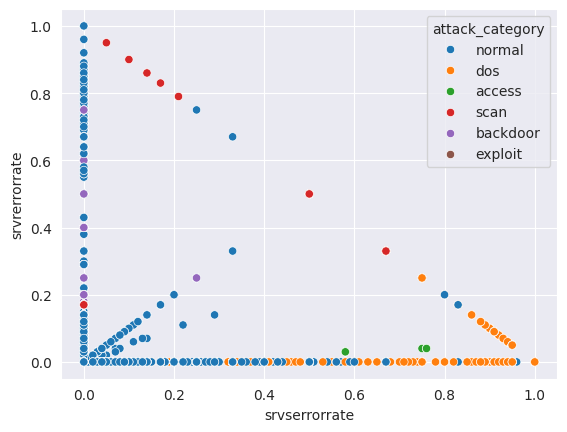

In [31]:
sns.scatterplot(data=df,x='srvserrorrate',y='srvrerrorrate',hue='attack_category')

In [32]:
pd.DataFrame(df['dsthostcount'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostcount,125973.0,182.148945,99.206213,0.0,82.0,255.0,255.0,255.0


In [33]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostcount'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 11.0
20 percentile value is 50.0
30 percentile value is 123.0
40 percentile value is 237.0
50 percentile value is 255.0
60 percentile value is 255.0
70 percentile value is 255.0
80 percentile value is 255.0
90 percentile value is 255.0
100 percentile value is 255.0


In [34]:
df['dcount_bin'] = None

for i in range(len(df)):
    rate = df.loc[i,'dsthostcount']
    if rate < 50:
        df.loc[i,'dcount_bin'] = 1
    elif rate >= 50 and rate < 100:
        df.loc[i,'dcount_bin'] = 2
    elif rate >= 100 and rate < 150:
        df.loc[i,'dcount_bin'] = 3
    elif rate >= 150 and rate < 200:
        df.loc[i,'dcount_bin'] = 4
    else:
        df.loc[i,'dcount_bin'] = 5

In [35]:
df['dcount_bin'].value_counts()

,count
dcount_bin,
5,79152
1,24956
2,9377
3,6789
4,5699


In [111]:
pd.pivot_table(data=df,index='cbin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
cbin,,,,,,,
1,993.0,958.0,8195.0,51.0,62365.0,9341.0,81903
2,NaN,NaN,15974.0,1.0,2999.0,476.0,19450
3,NaN,NaN,18808.0,NaN,1556.0,303.0,20667
4,NaN,NaN,391.0,NaN,317.0,407.0,1115
5,NaN,NaN,369.0,NaN,90.0,329.0,788
6,NaN,NaN,1234.0,NaN,16.0,800.0,2050
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [36]:
pd.pivot_table(data=df,index='dcount_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
dcount_bin,,,,,,,
1,635.0,192.0,586.0,42.0,18971.0,4530.0,24956
2,3.0,199.0,518.0,1.0,8306.0,350.0,9377
3,24.0,102.0,586.0,NaN,5794.0,283.0,6789
4,29.0,98.0,586.0,NaN,4615.0,371.0,5699
5,302.0,367.0,42695.0,9.0,29657.0,6122.0,79152
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [37]:
pd.DataFrame(df['dsthostsrvcount'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvcount,125973.0,115.653005,110.702741,0.0,10.0,63.0,255.0,255.0


In [38]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsrvcount'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 2.0
20 percentile value is 7.0
30 percentile value is 14.0
40 percentile value is 20.0
50 percentile value is 63.0
60 percentile value is 157.0
70 percentile value is 254.0
80 percentile value is 255.0
90 percentile value is 255.0
100 percentile value is 255.0


In [39]:
df['dscount_bin'] = None

for i in range(len(df)):
    rate = df.loc[i,'dsthostsrvcount']
    if rate < 50:
        df.loc[i,'dscount_bin'] = 1
    elif rate >= 50 and rate < 100:
        df.loc[i,'dscount_bin'] = 2
    elif rate >= 100 and rate < 150:
        df.loc[i,'dscount_bin'] = 3
    elif rate >= 150 and rate < 200:
        df.loc[i,'dscount_bin'] = 4
    else:
        df.loc[i,'dscount_bin'] = 5

In [40]:
df['dscount_bin'].value_counts()

,count
dscount_bin,
1,59886
5,46266
2,9019
3,5854
4,4948


In [112]:
pd.pivot_table(data=df,index='sbin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
sbin,,,,,,,
1,985.0,958.0,42627.0,52.0,60541.0,11550.0,116713
2,8.0,NaN,238.0,NaN,4232.0,106.0,4584
3,NaN,NaN,271.0,NaN,2084.0,NaN,2355
4,NaN,NaN,232.0,NaN,389.0,NaN,621
5,NaN,NaN,369.0,NaN,90.0,NaN,459
6,NaN,NaN,1234.0,NaN,7.0,NaN,1241
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [41]:
pd.pivot_table(data=df,index='dscount_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
dscount_bin,,,,,,,
1,735.0,194.0,40272.0,48.0,10437.0,8200.0,59886
2,165.0,199.0,2565.0,4.0,4652.0,1434.0,9019
3,89.0,102.0,522.0,NaN,4241.0,900.0,5854
4,NaN,98.0,479.0,NaN,3790.0,581.0,4948
5,4.0,365.0,1133.0,NaN,44223.0,541.0,46266
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [42]:
pd.DataFrame(df['dsthostserrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostserrorrate,125973.0,0.284452,0.444784,0.0,0.0,0.0,1.0,1.0


In [43]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostserrorrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.09
80 percentile value is 1.0
90 percentile value is 1.0
100 percentile value is 1.0


In [44]:
df['dhserror_bin'] = None

for i in range(len(df)):
    rate = df.loc[i,'dsthostserrorrate']
    if rate < 0.25:
        df.loc[i,'dhserror_bin'] = 1
    elif rate >= 0.25 and rate < 0.5:
        df.loc[i,'dhserror_bin'] = 2
    elif rate >= 0.5 and rate < 0.75:
        df.loc[i,'dhserror_bin'] = 3
    else:
        df.loc[i,'dhserror_bin'] = 4

In [45]:
df['dhserror_bin'].value_counts()

,count
dhserror_bin,
1,89765
4,34985
2,676
3,547


In [113]:
pd.pivot_table(data=df,index='serror_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
serror_bin,,,,,,,
1,978.0,948.0,10533.0,50.0,65927.0,11218.0,89654
2,NaN,3.0,2.0,NaN,520.0,34.0,559
3,7.0,7.0,99.0,NaN,459.0,91.0,663
4,8.0,NaN,34337.0,2.0,437.0,313.0,35097
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [46]:
pd.pivot_table(data=df,index='dhserror_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
dhserror_bin,,,,,,,
1,972.0,958.0,10555.0,52.0,66007.0,11221.0,89765
2,8.0,NaN,62.0,NaN,468.0,138.0,676
3,9.0,NaN,64.0,NaN,419.0,55.0,547
4,4.0,NaN,34290.0,NaN,449.0,242.0,34985
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [47]:
pd.DataFrame(df['dsthostrerrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostrerrorrate,125973.0,0.118832,0.306557,0.0,0.0,0.0,0.0,1.0


In [48]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostrerrorrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 0.84
100 percentile value is 1.0


In [49]:
for i in range(80,91,1):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostrerrorrate'].dropna(),i)))

80 percentile value is 0.0
81 percentile value is 0.0
82 percentile value is 0.01
83 percentile value is 0.01
84 percentile value is 0.02
85 percentile value is 0.04
86 percentile value is 0.11
87 percentile value is 0.29
88 percentile value is 0.48
89 percentile value is 0.67
90 percentile value is 0.84


In [50]:
df['dhrerror_bin'] = None

for i in range(len(df)):
    rate = df.loc[i,'dsthostrerrorrate']
    if rate < 0.25:
        df.loc[i,'dhrerror_bin'] = 1
    elif rate >= 0.25 and rate < 0.5:
        df.loc[i,'dhrerror_bin'] = 2
    elif rate >= 0.5 and rate < 0.75:
        df.loc[i,'dhrerror_bin'] = 3
    else:
        df.loc[i,'dhrerror_bin'] = 4

In [51]:
df['dhrerror_bin'].value_counts()

,count
dhrerror_bin,
1,109261
4,13423
2,1680
3,1609


In [52]:
pd.pivot_table(data=df,index='dhrerror_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
dhrerror_bin,,,,,,,
1,940.0,907.0,37559.0,50.0,63820.0,5985.0,109261
2,2.0,39.0,216.0,NaN,481.0,942.0,1680
3,2.0,6.0,258.0,2.0,410.0,931.0,1609
4,49.0,6.0,6938.0,NaN,2632.0,3798.0,13423
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [53]:
pd.pivot_table(data=df,index='dhserror_bin',columns='dhrerror_bin',values='binary_attack',aggfunc='sum',margins=True)

dhrerror_bin,1,2,3,4,All
dhserror_bin,,,,,
1,10679.0,1155.0,1148.0,10776.0,23758
2,132.0,11.0,50.0,15.0,208
3,94.0,33.0,1.0,NaN,128
4,34536.0,NaN,NaN,NaN,34536
All,45441.0,1199.0,1199.0,10791.0,58630


<Axes: xlabel='dsthostserrorrate', ylabel='dsthostrerrorrate'>

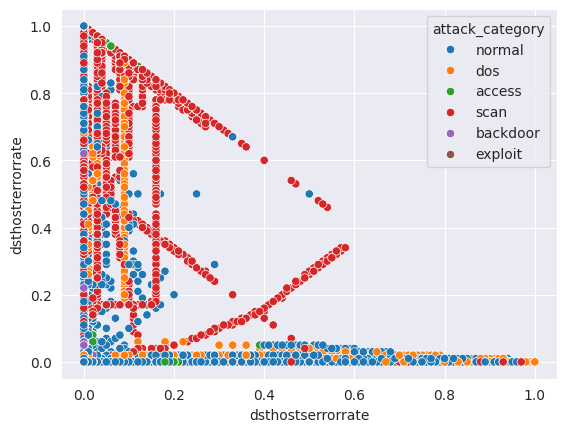

In [54]:
sns.scatterplot(data=df,x='dsthostserrorrate',y='dsthostrerrorrate',hue='attack_category')

In [55]:
pd.DataFrame(df['dsthostsrvserrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvserrorrate,125973.0,0.278485,0.445669,0.0,0.0,0.0,1.0,1.0


In [56]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsrvserrorrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.01
80 percentile value is 1.0
90 percentile value is 1.0
100 percentile value is 1.0


In [57]:
df['dhsrvserror_bin'] = None

for i in range(len(df)):
    rate = df.loc[i,'dsthostsrvserrorrate']
    if rate < 0.25:
        df.loc[i,'dhsrvserror_bin'] = 1
    elif rate >= 0.25 and rate < 0.5:
        df.loc[i,'dhsrvserror_bin'] = 2
    elif rate >= 0.5 and rate < 0.75:
        df.loc[i,'dhsrvserror_bin'] = 3
    else:
        df.loc[i,'dhsrvserror_bin'] = 4

In [58]:
df['dhsrvserror_bin'].value_counts()

,count
dhsrvserror_bin,
1,90678
4,34710
3,341
2,244


In [59]:
pd.pivot_table(data=df,index='dhsrvserror_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
dhsrvserror_bin,,,,,,,
1,978.0,956.0,10688.0,51.0,66853.0,11152.0,90678
2,3.0,2.0,66.0,1.0,170.0,2.0,244
3,8.0,NaN,96.0,NaN,147.0,90.0,341
4,4.0,NaN,34121.0,NaN,173.0,412.0,34710
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [60]:
pd.DataFrame(df['dsthostsrvrerrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvrerrorrate,125973.0,0.12024,0.319459,0.0,0.0,0.0,0.0,1.0


In [61]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsrvrerrorrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 1.0
100 percentile value is 1.0


In [62]:
df['dhsrvrerror_bin'] = None

for i in range(len(df)):
    rate = df.loc[i,'dsthostsrvrerrorrate']
    if rate < 0.25:
        df.loc[i,'dhsrvrerror_bin'] = 1
    elif rate >= 0.25 and rate < 0.5:
        df.loc[i,'dhsrvrerror_bin'] = 2
    elif rate >= 0.5 and rate < 0.75:
        df.loc[i,'dhsrvrerror_bin'] = 3
    else:
        df.loc[i,'dhsrvrerror_bin'] = 4

In [63]:
df['dhsrvrerror_bin'].value_counts()

,count
dhsrvrerror_bin,
1,110355
4,14603
3,639
2,376


In [64]:
pd.pivot_table(data=df,index='dhsrvrerror_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
dhsrvrerror_bin,,,,,,,
1,942.0,907.0,38084.0,51.0,63919.0,6452.0,110355
2,NaN,39.0,NaN,1.0,299.0,37.0,376
3,2.0,6.0,NaN,NaN,550.0,81.0,639
4,49.0,6.0,6887.0,NaN,2575.0,5086.0,14603
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


<Axes: xlabel='dsthostsrvserrorrate', ylabel='dsthostsrvrerrorrate'>

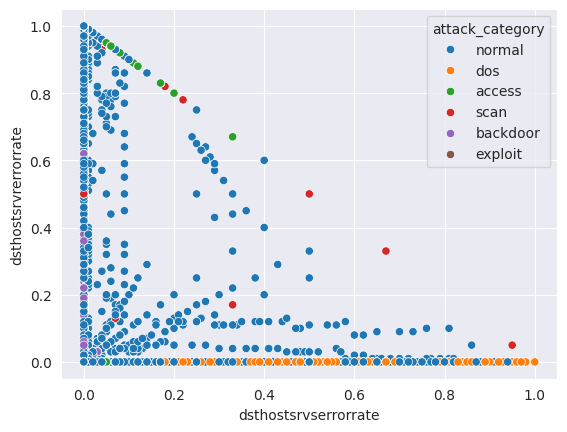

In [65]:
sns.scatterplot(data=df,x='dsthostsrvserrorrate',y='dsthostsrvrerrorrate',hue='attack_category')

In [66]:
pd.DataFrame(df['samesrvrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
samesrvrate,125973.0,0.660928,0.439623,0.0,0.09,1.0,1.0,1.0


In [67]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['samesrvrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.03
20 percentile value is 0.07
30 percentile value is 0.14
40 percentile value is 1.0
50 percentile value is 1.0
60 percentile value is 1.0
70 percentile value is 1.0
80 percentile value is 1.0
90 percentile value is 1.0
100 percentile value is 1.0


In [68]:
df['samesrv_bin'] = None

for i in range(len(df)):
    rate = df.loc[i,'samesrvrate']
    if rate < 0.25:
        df.loc[i,'samesrv_bin'] = 1
    elif rate >= 0.25 and rate < 0.5:
        df.loc[i,'samesrv_bin'] = 2
    elif rate >= 0.5 and rate < 0.75:
        df.loc[i,'samesrv_bin'] = 3
    else:
        df.loc[i,'samesrv_bin'] = 4

In [69]:
df['samesrv_bin'].value_counts()

,count
samesrv_bin,
4,78181
1,42258
2,3262
3,2272


In [70]:
pd.pivot_table(data=df,index='samesrv_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
samesrv_bin,,,,,,,
1,NaN,NaN,37984.0,2.0,1129.0,3143.0,42258
2,NaN,NaN,2312.0,NaN,651.0,299.0,3262
3,7.0,2.0,454.0,3.0,1261.0,545.0,2272
4,986.0,956.0,4221.0,47.0,64302.0,7669.0,78181
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [71]:
pd.DataFrame(df['diffsrvrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
diffsrvrate,125973.0,0.063053,0.180314,0.0,0.0,0.0,0.06,1.0


In [72]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['diffsrvrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.06
80 percentile value is 0.06
90 percentile value is 0.07
100 percentile value is 1.0


In [73]:
df['diffsrv_bin'] = None

for i in range(len(df)):
    rate = df.loc[i,'diffsrvrate']
    if rate < 0.25:
        df.loc[i,'diffsrv_bin'] = 1
    elif rate >= 0.25 and rate < 0.5:
        df.loc[i,'diffsrv_bin'] = 2
    elif rate >= 0.5 and rate < 0.75:
        df.loc[i,'diffsrv_bin'] = 3
    else:
        df.loc[i,'diffsrv_bin'] = 4

In [74]:
df['diffsrv_bin'].value_counts()

,count
diffsrv_bin,
1,119158
4,3707
3,1723
2,1385


In [75]:
pd.pivot_table(data=df,index='diffsrv_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
diffsrv_bin,,,,,,,
1,986.0,949.0,44176.0,48.0,64656.0,8343.0,119158
2,NaN,4.0,545.0,NaN,546.0,290.0,1385
3,1.0,5.0,161.0,2.0,1068.0,486.0,1723
4,6.0,NaN,89.0,2.0,1073.0,2537.0,3707
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [76]:
pd.pivot_table(data=df,index='samesrv_bin',columns='diffsrv_bin',values='binary_attack',aggfunc='count',margins=True)

diffsrv_bin,1,2,3,4,All
samesrv_bin,,,,,
1,38518.0,775.0,770.0,2195.0,42258
2,2210.0,352.0,520.0,180.0,3262
3,408.0,139.0,393.0,1332.0,2272
4,78022.0,119.0,40.0,NaN,78181
All,119158.0,1385.0,1723.0,3707.0,125973


In [77]:
pd.pivot_table(data=df,index='samesrv_bin',columns='diffsrv_bin',values='binary_attack',aggfunc='sum',margins=True)

diffsrv_bin,1,2,3,4,All
samesrv_bin,,,,,
1,38127.0,372.0,483.0,2147.0,41129
2,2165.0,289.0,92.0,65.0,2611
3,404.0,128.0,57.0,422.0,1011
4,13806.0,50.0,23.0,NaN,13879
All,54502.0,839.0,655.0,2634.0,58630


<Axes: xlabel='samesrvrate', ylabel='diffsrvrate'>

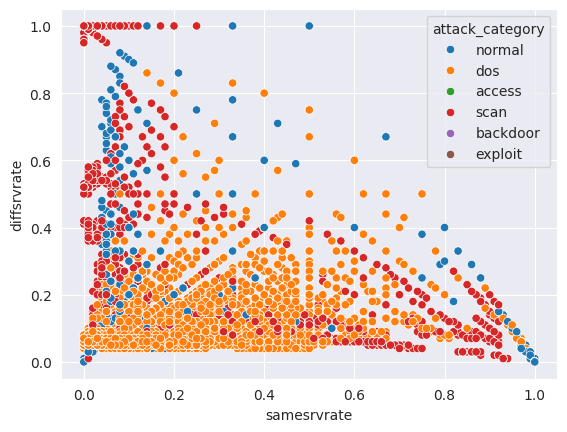

In [78]:
sns.scatterplot(data=df,x='samesrvrate',y='diffsrvrate',hue='attack_category')

In [79]:
pd.DataFrame(df['dsthostsamesrvrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsamesrvrate,125973.0,0.521242,0.448949,0.0,0.05,0.51,1.0,1.0


In [80]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsamesrvrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.01
20 percentile value is 0.03
30 percentile value is 0.06
40 percentile value is 0.11
50 percentile value is 0.51
60 percentile value is 0.98
70 percentile value is 1.0
80 percentile value is 1.0
90 percentile value is 1.0
100 percentile value is 1.0


In [81]:
df['dhsamesrv_bin'] = None

for i in range(len(df)):
    rate = df.loc[i,'dsthostsamesrvrate']
    if rate < 0.25:
        df.loc[i,'dhsamesrv_bin'] = 1
    elif rate >= 0.25 and rate < 0.5:
        df.loc[i,'dhsamesrv_bin'] = 2
    elif rate >= 0.5 and rate < 0.75:
        df.loc[i,'dhsamesrv_bin'] = 3
    else:
        df.loc[i,'dhsamesrv_bin'] = 4

In [82]:
df['dhsamesrv_bin'].value_counts()

,count
dhsamesrv_bin,
4,58161
1,56088
2,6398
3,5326


In [83]:
pd.pivot_table(data=df,index='dhsamesrv_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
dhsamesrv_bin,,,,,,,
1,160.0,2.0,40673.0,10.0,8213.0,7030.0,56088
2,169.0,NaN,2016.0,1.0,4080.0,132.0,6398
3,37.0,NaN,697.0,2.0,4451.0,139.0,5326
4,627.0,956.0,1585.0,39.0,50599.0,4355.0,58161
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [84]:
pd.DataFrame(df['dsthostdiffsrvrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostdiffsrvrate,125973.0,0.082951,0.188922,0.0,0.0,0.02,0.07,1.0


In [85]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostdiffsrvrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.01
50 percentile value is 0.02
60 percentile value is 0.05
70 percentile value is 0.07
80 percentile value is 0.07
90 percentile value is 0.1
100 percentile value is 1.0


In [86]:
df['dhdiffsrv_bin'] = None

for i in range(len(df)):
    rate = df.loc[i,'dsthostdiffsrvrate']
    if rate < 0.25:
        df.loc[i,'dhdiffsrv_bin'] = 1
    elif rate >= 0.25 and rate < 0.5:
        df.loc[i,'dhdiffsrv_bin'] = 2
    elif rate >= 0.5 and rate < 0.75:
        df.loc[i,'dhdiffsrv_bin'] = 3
    else:
        df.loc[i,'dhdiffsrv_bin'] = 4

In [87]:
df['dhdiffsrv_bin'].value_counts()

,count
dhdiffsrv_bin,
1,116522
4,3777
3,3586
2,2088


In [88]:
pd.pivot_table(data=df,index='dhdiffsrv_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
dhdiffsrv_bin,,,,,,,
1,975.0,958.0,44582.0,49.0,64269.0,5689.0,116522
2,14.0,NaN,118.0,NaN,913.0,1043.0,2088
3,2.0,NaN,187.0,2.0,1552.0,1843.0,3586
4,2.0,NaN,84.0,1.0,609.0,3081.0,3777
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [89]:
df.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes', 'land',
       'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin', 'numcompromised',
       'rootshell', 'suattempted', 'numroot', 'numfilecreations', 'numshells', 'numaccessfiles',
       'numoutboundcmds', 'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate',
       'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate',
       'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate',
       'attack', 'lastflag', 'is_attack', 'attack_category', 'cbin', 'sbin', 'serror_bin',
       'rerror_bin', 'binary_attack', 'srvserrorrate_bin', 'srvrerrorrate_bin', 'dcount_bin',
       'dscount_bin', 'dhserror_bin', 'dhrerror_bin', 'dhsrvserror_bin', 'dhsrvrerror_bin',
       'same

In [90]:
pd.DataFrame(df['dsthostsamesrcportrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsamesrcportrate,125973.0,0.148379,0.308997,0.0,0.0,0.0,0.06,1.0


In [91]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsamesrcportrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.01
70 percentile value is 0.03
80 percentile value is 0.15
90 percentile value is 0.84
100 percentile value is 1.0


In [92]:
for i in range(80,91,1):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsamesrcportrate'].dropna(),i)))

80 percentile value is 0.15
81 percentile value is 0.18
82 percentile value is 0.22
83 percentile value is 0.25
84 percentile value is 0.32
85 percentile value is 0.35
86 percentile value is 0.42
87 percentile value is 0.5
88 percentile value is 0.55
89 percentile value is 0.7
90 percentile value is 0.84


In [94]:
df['dhsrcport_bin'] = None
for i in range(len(df)):
    rate = df.loc[i,'dsthostsamesrcportrate']
    if rate < 0.25:
        df.loc[i,'dhsrcport_bin'] = 1
    elif rate >= 0.25 and rate < 0.5:
        df.loc[i,'dhsrcport_bin'] = 2
    elif rate >= 0.5 and rate < 0.75:
        df.loc[i,'dhsrcport_bin'] = 3
    else:
        df.loc[i,'dhsrcport_bin'] = 4

In [95]:
df['dhsrcport_bin'].value_counts()

,count
dhsrcport_bin,
1,103746
4,13529
2,5561
3,3137


In [96]:
pd.pivot_table(data=df,index='dhsrcport_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
dhsrcport_bin,,,,,,,
1,373,942,42085,18,57013,3315,103746
2,39,8,814,3,3959,738,5561
3,8,4,572,7,1845,701,3137
4,573,4,1500,24,4526,6902,13529
All,993,958,44971,52,67343,11656,125973


In [97]:
pd.DataFrame(df['dsthostsrvdiffhostrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvdiffhostrate,125973.0,0.032542,0.112564,0.0,0.0,0.0,0.02,1.0


In [98]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsrvdiffhostrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.01
80 percentile value is 0.02
90 percentile value is 0.05
100 percentile value is 1.0


In [99]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsrvdiffhostrate'].dropna(),i)))

90 percentile value is 0.05
91 percentile value is 0.06
92 percentile value is 0.07
93 percentile value is 0.09
94 percentile value is 0.13
95 percentile value is 0.18
96 percentile value is 0.25
97 percentile value is 0.33
98 percentile value is 0.5
99 percentile value is 0.52
100 percentile value is 1.0


In [100]:
df['dshdiff_bin'] = None

for i in range(len(df)):
    rate = df.loc[i,'dsthostsrvdiffhostrate']
    if rate < 0.25:
        df.loc[i,'dshdiff_bin'] = 1
    elif rate >= 0.25 and rate < 0.5:
        df.loc[i,'dshdiff_bin'] = 2
    elif rate >= 0.5 and rate < 0.75:
        df.loc[i,'dshdiff_bin'] = 3
    else:
        df.loc[i,'dshdiff_bin'] = 4

In [101]:
df['dshdiff_bin'].value_counts()

,count
dshdiff_bin,
1,120501
3,2781
2,1970
4,721


In [102]:
pd.pivot_table(data=df,index='dshdiff_bin',columns='attack_category',values='duration',aggfunc='count',margins=True)

attack_category,access,backdoor,dos,exploit,normal,scan,All
dshdiff_bin,,,,,,,
1,937.0,958.0,44875.0,45.0,66377.0,7309.0,120501
2,47.0,NaN,23.0,2.0,653.0,1245.0,1970
3,8.0,NaN,63.0,4.0,174.0,2532.0,2781
4,1.0,NaN,10.0,1.0,139.0,570.0,721
All,993.0,958.0,44971.0,52.0,67343.0,11656.0,125973


In [105]:
df.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes', 'land',
       'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin', 'numcompromised',
       'rootshell', 'suattempted', 'numroot', 'numfilecreations', 'numshells', 'numaccessfiles',
       'numoutboundcmds', 'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate',
       'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate',
       'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate',
       'attack', 'lastflag', 'is_attack', 'attack_category', 'cbin', 'sbin', 'serror_bin',
       'rerror_bin', 'binary_attack', 'srvserrorrate_bin', 'srvrerrorrate_bin', 'dcount_bin',
       'dscount_bin', 'dhserror_bin', 'dhrerror_bin', 'dhsrvserror_bin', 'dhsrvrerror_bin',
       'same

In [106]:
bins_df = df[['attack_category','binary_attack','cbin', 'sbin', 'serror_bin',
       'rerror_bin', 'srvserrorrate_bin', 'srvrerrorrate_bin', 'dcount_bin',
       'dscount_bin', 'dhserror_bin', 'dhrerror_bin', 'dhsrvserror_bin', 'dhsrvrerror_bin',
       'samesrv_bin', 'diffsrv_bin', 'dhsamesrv_bin', 'dhdiffsrv_bin', 'dhsrcport_bin',
       'dshdiff_bin']].copy()